In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing given datasets

In [3]:
df = pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv").drop(columns="id")
test = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv").drop(columns="id")

In [4]:
import pandas as pd
from IPython.display import display

def inspection(dataset):
    """
    Perform inspection on a dataset.
    """
    # Display the first few rows of the dataset
    print("Head of the dataset:")
    display(dataset.head())
    
    # Display the shape of the dataset
    print("Shape of the dataset:")
    display(dataset.shape)

    # Display basic information about the dataset
    print("\nDataset Info:")
    display(pd.DataFrame(dataset.dtypes, columns=['Data Type']))

    # Check for missing values
    print("\nMissing Values:")
    display(pd.DataFrame(dataset.isnull().sum(), columns=['Missing Values']))

    # Display basic statistics for numerical columns
    print("\nSummary Statistics:")
    display(dataset.describe())
    
    #Duplicates
    print("\nDuplicate Rows:")
    duplicate_rows = dataset[dataset.duplicated()]
    if duplicate_rows.empty:
        print("No duplicate rows found.")
    else:
        display(duplicate_rows)

    # Display unique values for categorical columns
    print("\nUnique Values in Categorical Columns:")
    categorical_columns = dataset.select_dtypes(include='object').columns
    if len(categorical_columns) == 0:
        print("No categorical columns found.")
    else:
        for column in categorical_columns:
            unique_values = dataset[column].unique()
            unique_df = pd.DataFrame({column: unique_values})
            display(unique_df)


In [5]:
inspection(df)

Head of the dataset:


,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


Shape of the dataset:


(10407, 12)


Dataset Info:


,Data Type
allelectrons_Total,float64
density_Total,float64
allelectrons_Average,float64
val_e_Average,float64
atomicweight_Average,float64
ionenergy_Average,float64
el_neg_chi_Average,float64
R_vdw_element_Average,float64
R_cov_element_Average,float64
zaratio_Average,float64



Missing Values:


,Missing Values
allelectrons_Total,0
density_Total,0
allelectrons_Average,0
val_e_Average,0
atomicweight_Average,0
ionenergy_Average,0
el_neg_chi_Average,0
R_vdw_element_Average,0
R_cov_element_Average,0
zaratio_Average,0



Summary Statistics:


,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000



Duplicate Rows:
No duplicate rows found.

Unique Values in Categorical Columns:
No categorical columns found.


In [6]:
inspection(test)

Head of the dataset:


,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


Shape of the dataset:


(6939, 11)


Dataset Info:


,Data Type
allelectrons_Total,float64
density_Total,float64
allelectrons_Average,float64
val_e_Average,float64
atomicweight_Average,float64
ionenergy_Average,float64
el_neg_chi_Average,float64
R_vdw_element_Average,float64
R_cov_element_Average,float64
zaratio_Average,float64



Missing Values:


,Missing Values
allelectrons_Total,0
density_Total,0
allelectrons_Average,0
val_e_Average,0
atomicweight_Average,0
ionenergy_Average,0
el_neg_chi_Average,0
R_vdw_element_Average,0
R_cov_element_Average,0
zaratio_Average,0



Summary Statistics:


,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
count,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000
mean,126.460128,14.794020,17.406186,4.546852,38.422790,10.921512,2.608119,1.737907,0.949638,0.491675,2.152065
std,207.564499,18.982447,10.996089,0.683158,27.344351,1.378980,0.322873,0.190584,0.179266,0.060829,1.958213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.584314,2.527500,1.678000,0.866667,0.476095,0.812440
50%,100.000000,10.650000,12.666667,4.750000,26.203827,11.202760,2.706000,1.736000,0.920000,0.488550,1.351550
75%,128.000000,16.601328,22.000000,4.800000,48.719500,11.645560,2.806667,1.820000,0.990000,0.496118,2.780220
max,10116.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615333,0.825990,10.970000



Duplicate Rows:
No duplicate rows found.

Unique Values in Categorical Columns:
No categorical columns found.


## EDA

In [7]:
def numerical_eda1(data):
    """
    Perform Exploratory Data Analysis (EDA) on numerical data.

    """
    print("\nPercentage of Outliers and Plots:")
    outlier_threshold=1.5
    for column in data.select_dtypes(include=['int64', 'float64']).columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - outlier_threshold * iqr
        upper_bound = q3 + outlier_threshold * iqr
        outliers_count = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
        percentage_outliers = (outliers_count / len(data)) * 100
        print(f"{column}: {percentage_outliers:.2f}% outliers")

        # Create subplots for box plot and distribution plot
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Box Plot
        sns.boxplot(x=data[column], showfliers=True, ax=axes[0])
        axes[0].set_title(f'Box Plot of {column} with Outliers Highlighted')

        # Distribution Plot
        sns.histplot(data[column], kde=True, ax=axes[1])
        axes[1].set_title(f'Distribution of {column}')

        plt.show()


Percentage of Outliers and Plots:
allelectrons_Total: 9.73% outliers


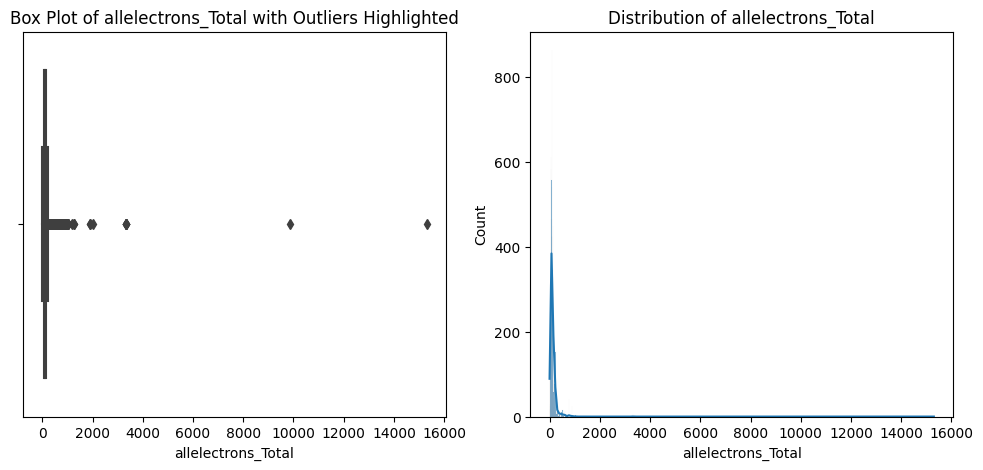

density_Total: 8.31% outliers


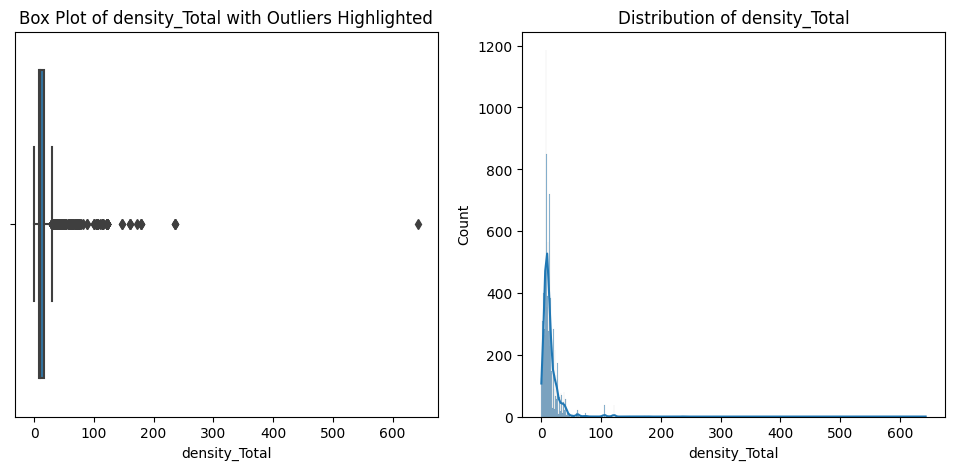

allelectrons_Average: 5.74% outliers


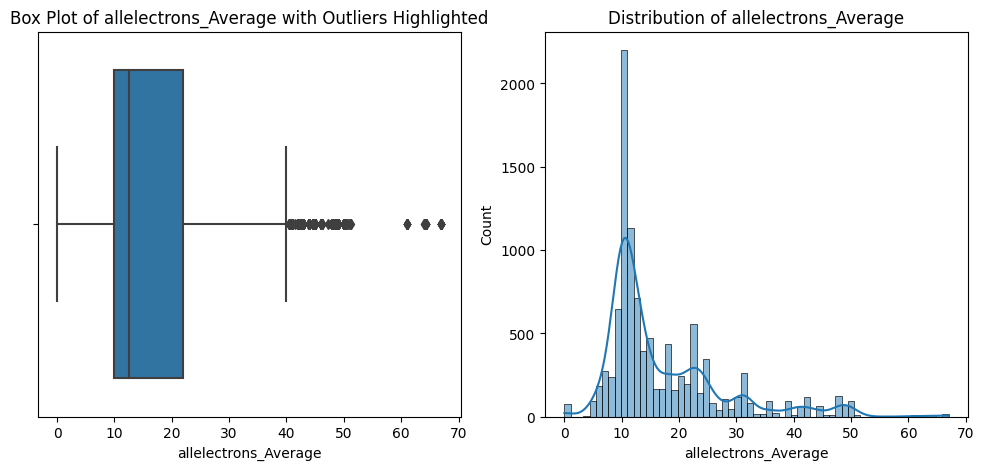

val_e_Average: 1.86% outliers


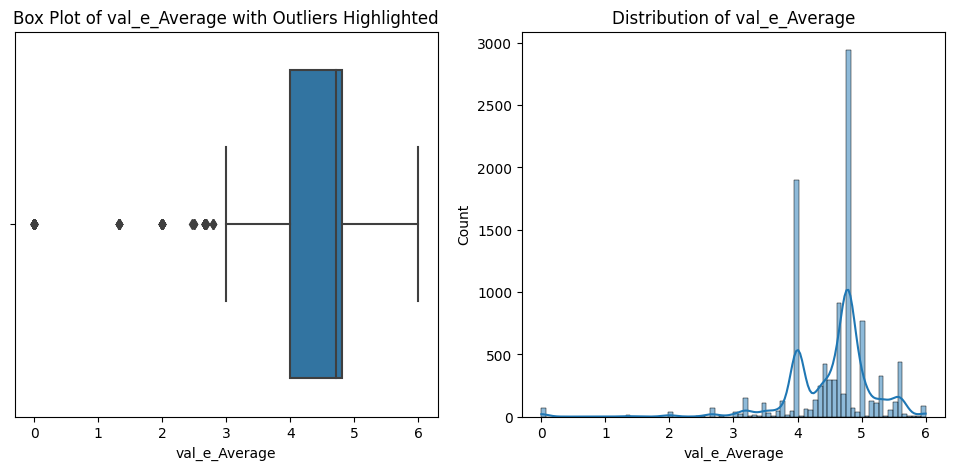

atomicweight_Average: 6.40% outliers


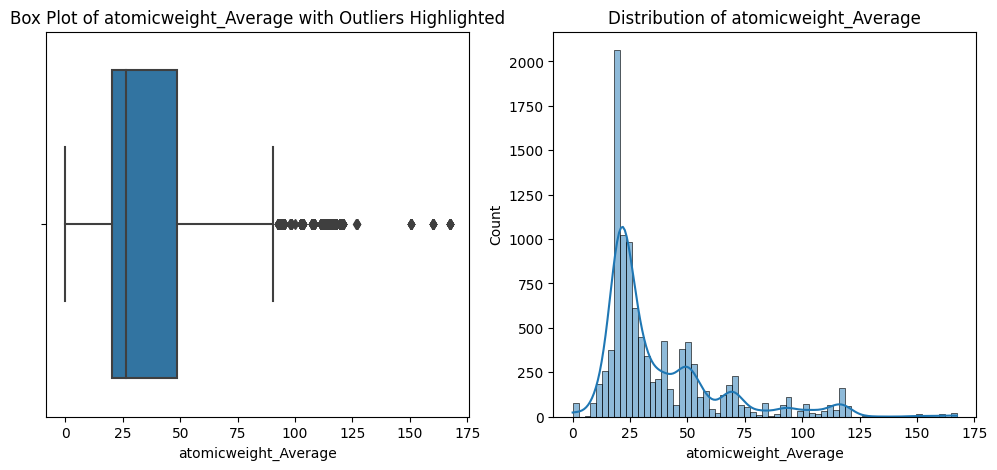

ionenergy_Average: 5.95% outliers


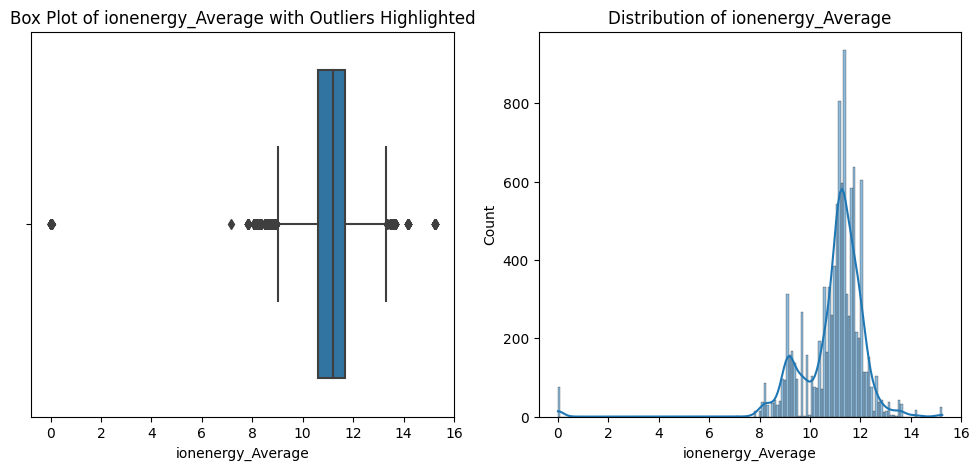

el_neg_chi_Average: 7.28% outliers


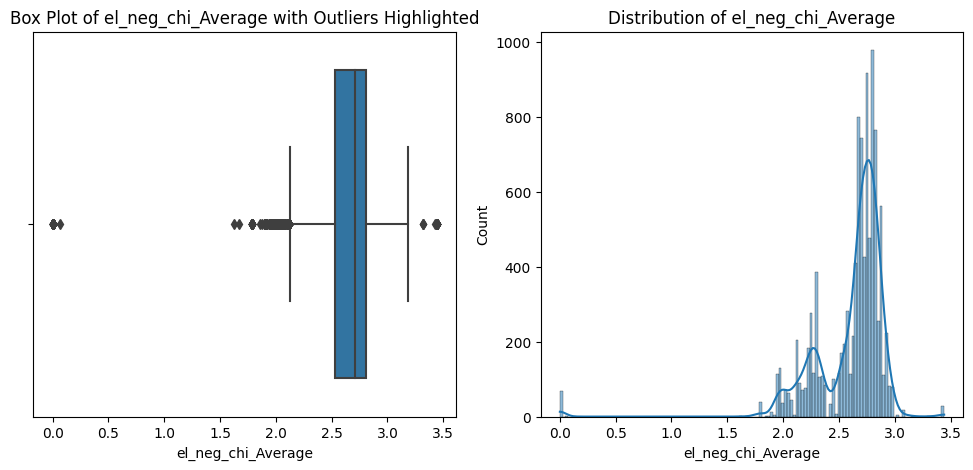

R_vdw_element_Average: 7.00% outliers


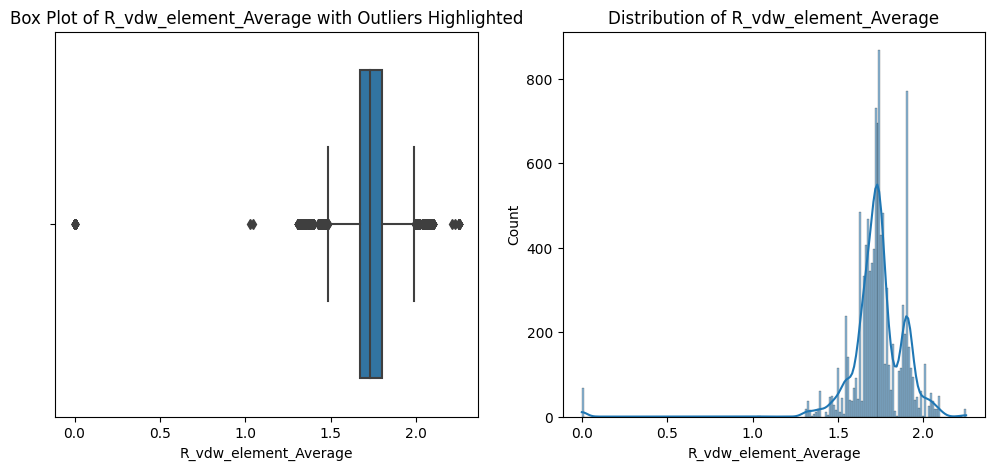

R_cov_element_Average: 17.96% outliers


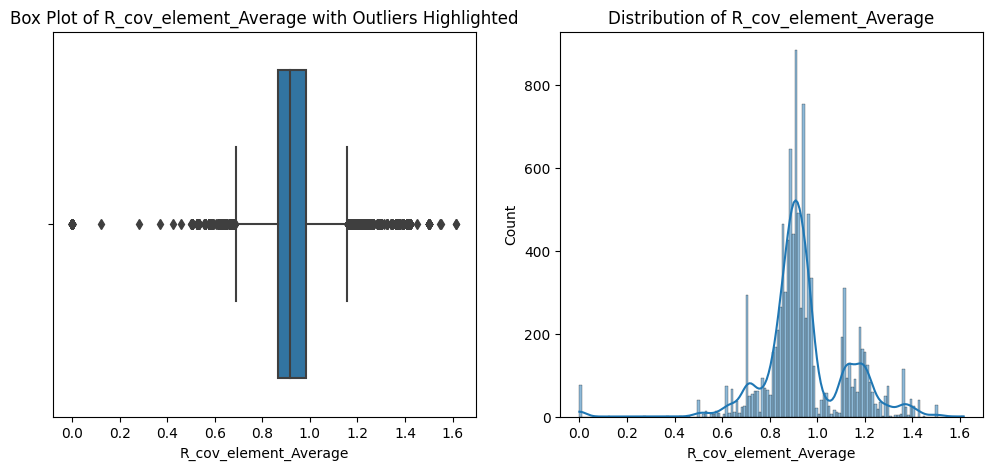

zaratio_Average: 14.71% outliers


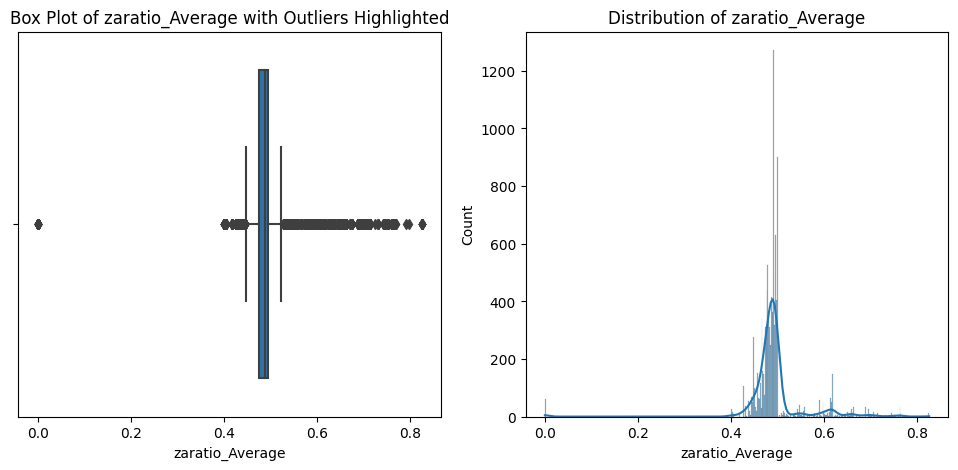

density_Average: 7.54% outliers


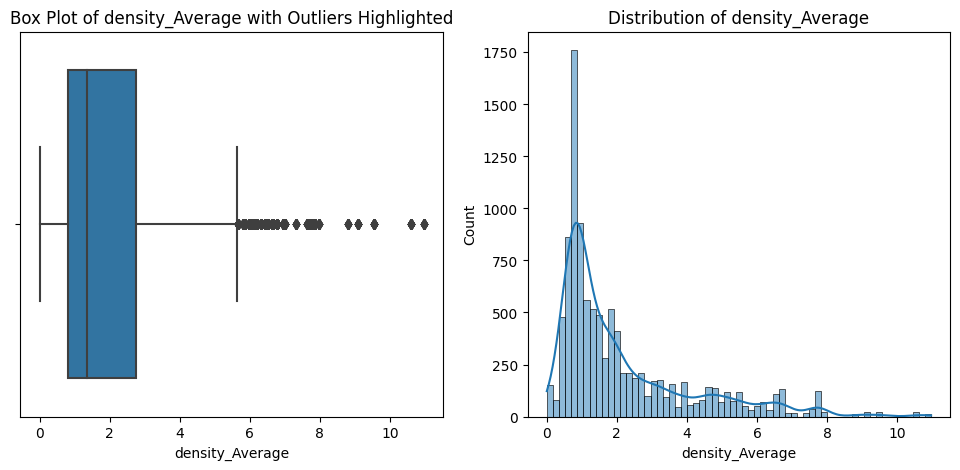

Hardness: 0.00% outliers


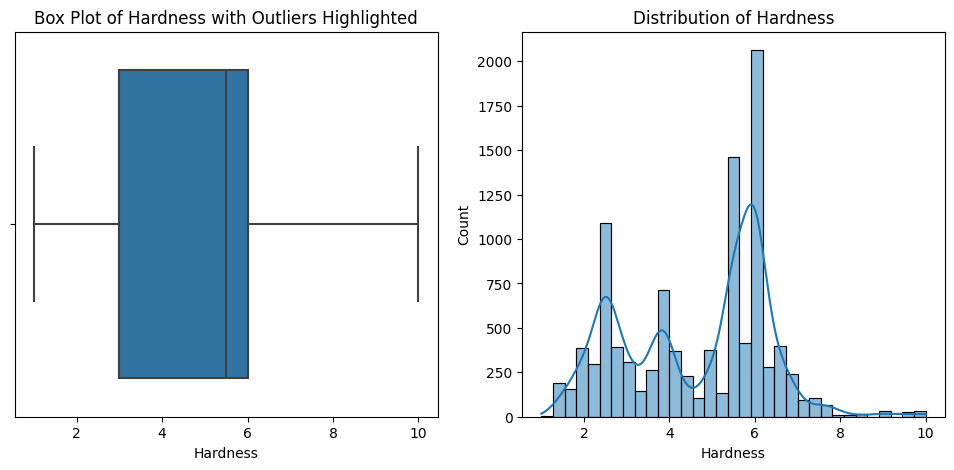

In [8]:
numerical_eda1(df)

In [9]:
def remove_outliers(df):
    """
    Remove rows containing outliers from a DataFrame using the Interquartile Range (IQR) method for all columns.
    """
    k=1.5
    cleaned_df = df.copy()

    for column_name in df.columns:
        # Calculate the first and third quartiles (Q1 and Q3)
        q1, q3 = np.percentile(df[column_name], [25, 75])

        # Calculate the IQR (Interquartile Range)
        iqr = q3 - q1

        # Define the lower and upper bounds for outlier detection
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr

        # Create a boolean mask where True indicates that a row is not an outlier
        no_outliers_mask = (df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)

        # Apply the mask to get the cleaned DataFrame
        cleaned_df = cleaned_df[no_outliers_mask]

    return cleaned_df

In [10]:
df = remove_outliers(df)
df

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10396,62.0,8.337992,12.600000,4.800000,26.385218,11.116960,2.684000,1.680000,0.824000,0.498666,0.34857,6.0
10398,100.0,9.107996,10.000000,4.000000,20.298893,10.600980,2.698000,1.743000,0.914000,0.485063,1.71759,10.0
10401,104.0,11.202328,17.333333,4.666667,39.987667,11.408267,2.736667,1.796667,0.966667,0.485033,1.95480,6.8
10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0


In [11]:
def correlation_analysis(data, target_column='Hardness', overall_corr_threshold=0.9, low_corr_threshold=0.3):
    """
    Perform correlation analysis for numerical columns with high overall correlation and low correlation with the target.
    """
    overall_corr_matrix = data.corr()
    high_corr_pairs = []
    num_cols = overall_corr_matrix.shape[0]
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            if abs(overall_corr_matrix.iloc[i, j]) > overall_corr_threshold:
                high_corr_pairs.append((overall_corr_matrix.index[i], overall_corr_matrix.columns[j]))

    # Calculate the correlation of each numerical column with the target column
    target_correlation = overall_corr_matrix[[target_column]].sort_values(by=target_column, ascending=False)

    # Identify columns with low correlation with the target
    low_corr_columns = target_correlation[target_correlation[target_column].abs() < low_corr_threshold].index.tolist()

    # Create a correlation heatmap for all numerical columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(overall_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
    plt.title('Overall Correlation Heatmap for Numerical Columns')
    plt.show()

    # Display pairs of columns with high overall correlation
    print(f"\nPairs of columns with overall correlation greater than {overall_corr_threshold}:\n{high_corr_pairs}")

    # Create a bar plot for correlation with the target column
    plt.figure(figsize=(12, 6))
    sns.barplot(x=target_correlation[target_column], y=target_correlation.index, palette='coolwarm')
    plt.title(f'Correlation of Numerical Columns with {target_column}')
    plt.xlabel('Correlation')
    plt.show()

    # Display list of columns with low correlation with the target
    print(f"\nColumns with correlation less than {low_corr_threshold} with {target_column}:\n{low_corr_columns}")


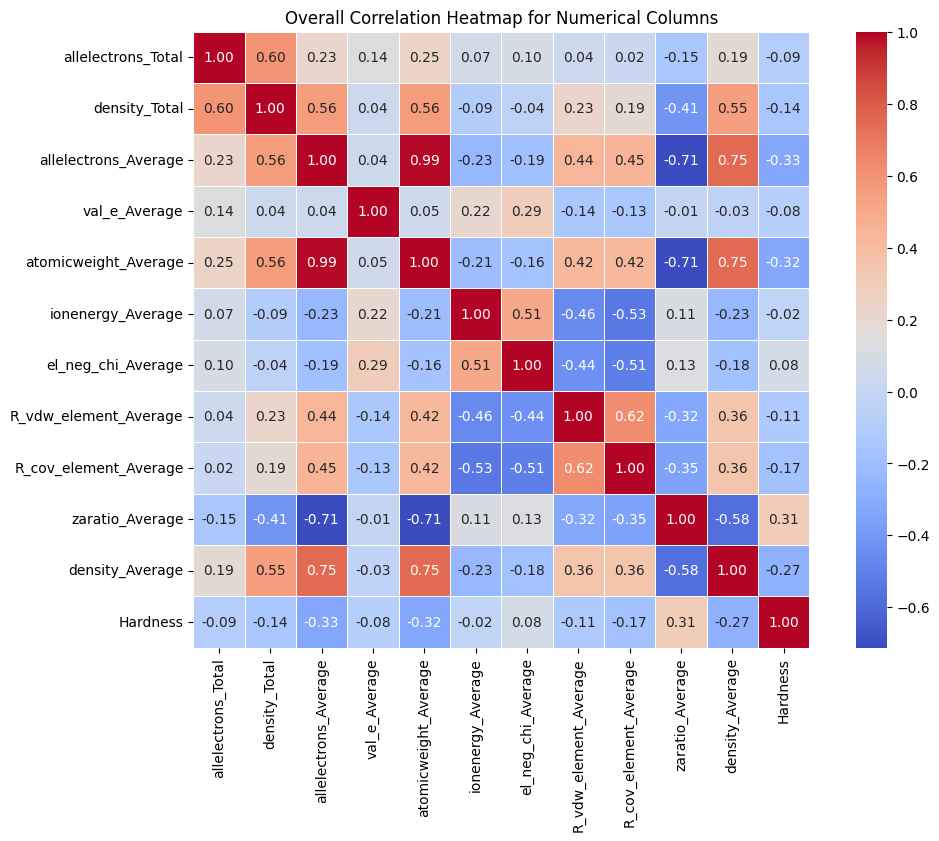


Pairs of columns with overall correlation greater than 0.9:
[('allelectrons_Average', 'atomicweight_Average')]


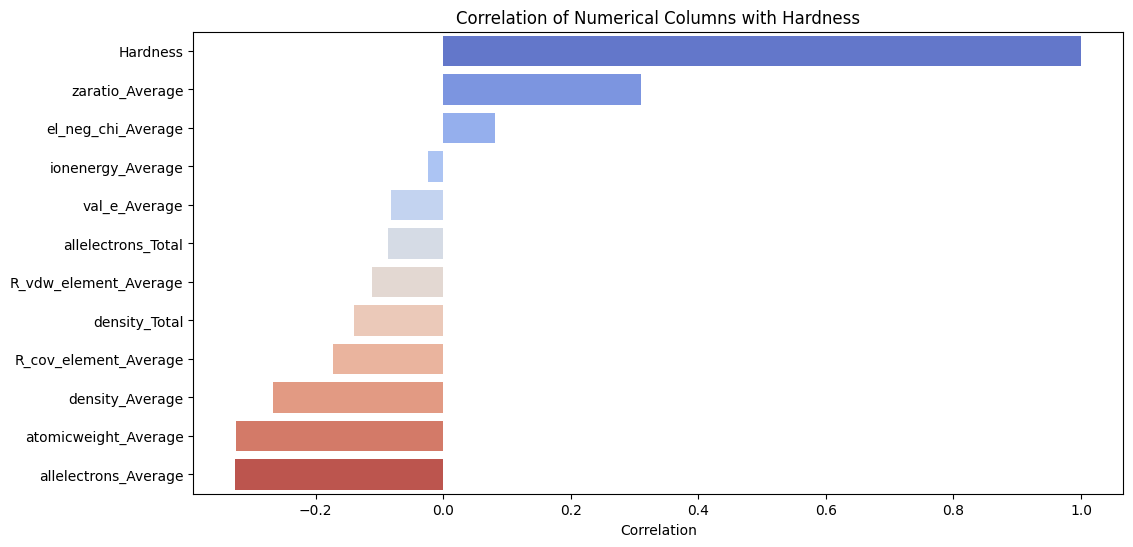


Columns with correlation less than 0.3 with Hardness:
['el_neg_chi_Average', 'ionenergy_Average', 'val_e_Average', 'allelectrons_Total', 'R_vdw_element_Average', 'density_Total', 'R_cov_element_Average', 'density_Average']


In [12]:
correlation_analysis(df)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Preprocessor

In [14]:
"""X = df.drop('Hardness', axis=1)
y = df['Hardness']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])"""

"X = df.drop('Hardness', axis=1)\ny = df['Hardness']\n\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)\nnumerical_features = X.select_dtypes(include=['int64', 'float64']).columns\ncategorical_features = X.select_dtypes(include=['object']).columns\n\n# Create transformers for numerical and categorical features\nnumerical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='mean')),\n    ('scaler', StandardScaler())\n])\n\ncategorical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='most_frequent')),\n    ('onehot', OneHotEncoder(handle_unknown='ignore'))\n])\n\n# Create a preprocessor using ColumnTransformer\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('num', numerical_transformer, numerical_features),\n        ('cat', categorical_transformer, categorical_features)\n    ])"

In [15]:
features= df.drop('Hardness',axis=1)
target=df['Hardness']

In [16]:
scaler = StandardScaler()
features=scaler.fit_transform(features)
test= scaler.fit_transform(test)

In [17]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense

## Keras Model

In [18]:
"""model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Updated optimizer with a different learning rate
optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mean_absolute_error')"""


"model = Sequential()\nmodel.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(32, activation='relu'))\nmodel.add(Dense(1, activation='linear'))\n\n# Updated optimizer with a different learning rate\noptimizer = RMSprop(learning_rate=0.001)\n\nmodel.compile(optimizer=optimizer, loss='mean_absolute_error')"

## Pipeline

In [19]:
'''pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model
pipeline.fit(X_train, y_train, model__epochs=50, model__batch_size=32, model__verbose=2, model__validation_split=0.1)

# Make predictions on validation set
y_val_pred = pipeline.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_val_pred)
print(f'Mean Absolute Error on Validation Set: {mae}')'''

"pipeline = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('model', model)\n])\n\n# Train the model\npipeline.fit(X_train, y_train, model__epochs=50, model__batch_size=32, model__verbose=2, model__validation_split=0.1)\n\n# Make predictions on validation set\ny_val_pred = pipeline.predict(X_val)\n\n# Evaluate the model\nmae = mean_absolute_error(y_val, y_val_pred)\nprint(f'Mean Absolute Error on Validation Set: {mae}')"

In [20]:
submission= pd.read_csv("/kaggle/input/playground-series-s3e25/sample_submission.csv")
submission

,id,Hardness
0,10407,4.647
1,10408,4.647
2,10409,4.647
3,10410,4.647
4,10411,4.647
...,...,...
6934,17341,4.647
6935,17342,4.647
6936,17343,4.647
6937,17344,4.647


In [21]:
'''X_train= df.drop('Hardness',axis=1)
y_train=df['Hardness']
X_test = test
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])'''

"X_train= df.drop('Hardness',axis=1)\ny_train=df['Hardness']\nX_test = test\nnumerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns\ncategorical_features = X_train.select_dtypes(include=['object']).columns\n\n# Create transformers for numerical and categorical features\nnumerical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='mean')),\n    ('scaler', StandardScaler())\n])\n\ncategorical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='most_frequent')),\n    ('onehot', OneHotEncoder(handle_unknown='ignore'))\n])\n\n# Create a preprocessor using ColumnTransformer\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('num', numerical_transformer, numerical_features),\n        ('cat', categorical_transformer, categorical_features)\n    ])"

In [22]:
# Updated model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_absolute_error')

In [23]:
'''pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model
pipeline.fit(X_train, y_train, model__epochs=50, model__batch_size=32, model__verbose=2, model__validation_split=0.1)

# Make predictions on validation set
y_val_pred = pipeline.predict(X_test)'''

"pipeline = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('model', model)\n])\n\n# Train the model\npipeline.fit(X_train, y_train, model__epochs=50, model__batch_size=32, model__verbose=2, model__validation_split=0.1)\n\n# Make predictions on validation set\ny_val_pred = pipeline.predict(X_test)"

In [24]:
model.fit(features,target, epochs=100,verbose=2,validation_split=0.2)
y_pred=model.predict(test)

Epoch 1/100
161/161 - 5s - loss: 2.0112 - val_loss: 1.4101 - 5s/epoch - 31ms/step
Epoch 2/100
161/161 - 0s - loss: 1.2738 - val_loss: 1.1691 - 463ms/epoch - 3ms/step
Epoch 3/100
161/161 - 0s - loss: 1.0757 - val_loss: 1.0544 - 454ms/epoch - 3ms/step
Epoch 4/100
161/161 - 0s - loss: 0.9961 - val_loss: 1.0199 - 465ms/epoch - 3ms/step
Epoch 5/100
161/161 - 0s - loss: 0.9711 - val_loss: 0.9348 - 458ms/epoch - 3ms/step
Epoch 6/100
161/161 - 0s - loss: 0.9491 - val_loss: 0.9370 - 448ms/epoch - 3ms/step
Epoch 7/100
161/161 - 0s - loss: 0.9471 - val_loss: 0.9354 - 454ms/epoch - 3ms/step
Epoch 8/100
161/161 - 0s - loss: 0.9370 - val_loss: 0.9784 - 448ms/epoch - 3ms/step
Epoch 9/100
161/161 - 0s - loss: 0.9348 - val_loss: 0.9490 - 456ms/epoch - 3ms/step
Epoch 10/100
161/161 - 0s - loss: 0.9268 - val_loss: 0.9786 - 449ms/epoch - 3ms/step
Epoch 11/100
161/161 - 0s - loss: 0.9284 - val_loss: 0.9394 - 465ms/epoch - 3ms/step
Epoch 12/100
161/161 - 0s - loss: 0.9191 - val_loss: 0.9404 - 454ms/epoch - 

In [25]:
len(y_pred)

6939

In [26]:
submission['Hardness'] = y_pred
submission.to_csv('submission.csv', index=False)

In [27]:
submission

,id,Hardness
0,10407,2.320472
1,10408,5.590165
2,10409,6.125767
3,10410,6.342093
4,10411,5.624181
...,...,...
6934,17341,5.848916
6935,17342,5.806149
6936,17343,6.226603
6937,17344,4.786262
